<a href="https://colab.research.google.com/github/SriramyaK/Deep-Learning/blob/master/90_Accuracy_Lamborghini_vs_Mclaren_vs_Jagaur_Classifier_resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Mounted at /content/gdrive


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
bs=64
#bs=16

In [0]:
folder = 'Lamborghini'
file = 'Lamb.txt'

In [0]:
folder = 'Mclaren'
file = 'Mclaren.txt'

In [0]:
folder = 'Jagaur'
file = 'Jagaur.txt'

In [0]:
path = Path(base_dir + 'data/Cars')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [11]:
path.ls()

[PosixPath('/content/gdrive/My Drive/fastai-v3/data/Cars/Lamb.txt'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/Cars/Mclaren.txt'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/Cars/Jagaur.txt'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/Cars/Lamborghini'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/Cars/Mclaren'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/Cars/Jagaur'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/Cars/models')]

In [0]:
classes = ['Lamborghini','Jagaur','Mclaren']

In [13]:
download_images(path/file, dest, max_pics=100,max_workers=0 )

Error https://www.autoguide.com/blog/wp-content/uploads/2019/02/JagCX75BondCarImage23101530.jpg HTTPConnectionPool(host='127.0.0.1', port=80): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f7c203ffa20>: Failed to establish a new connection: [Errno 111] Connection refused',))


In [14]:
for c in classes:
  print(c)
  verify_images(path/c,delete=True,max_workers=8)

Lamborghini


Jagaur


Exception ignored in: <ssl.SSLSocket fd=85, family=AddressFamily.AF_INET, type=2049, proto=6, laddr=('172.28.0.2', 35390), raddr=('35.227.203.50', 443)>
Exception ignored in: <ssl.SSLSocket fd=85, family=AddressFamily.AF_INET, type=2049, proto=6, laddr=('172.28.0.2', 35390), raddr=('35.227.203.50', 443)>
Exception ignored in: <ssl.SSLSocket fd=85, family=AddressFamily.AF_INET, type=2049, proto=6, laddr=('172.28.0.2', 35390), raddr=('35.227.203.50', 443)>
Exception ignored in: <ssl.SSLSocket fd=85, family=AddressFamily.AF_INET, type=2049, proto=6, laddr=('172.28.0.2', 35390), raddr=('35.227.203.50', 443)>
Exception ignored in: <ssl.SSLSocket fd=85, family=AddressFamily.AF_INET, type=2049, proto=6, laddr=('172.28.0.2', 35390), raddr=('35.227.203.50', 443)>
Exception ignored in: <ssl.SSLSocket fd=85, family=AddressFamily.AF_INET, type=2049, proto=6, laddr=('172.28.0.2', 35390), raddr=('35.227.203.50', 443)>
Exception ignored in: <ssl.SSLSocket fd=85, family=AddressFamily.AF_INET, type=204

cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai-v3/data/Cars/Jagaur/00000090.jpg'>
Mclaren


Exception ignored in: <ssl.SSLSocket fd=85, family=AddressFamily.AF_INET, type=2049, proto=6, laddr=('172.28.0.2', 35390), raddr=('35.227.203.50', 443)>
Exception ignored in: <ssl.SSLSocket fd=85, family=AddressFamily.AF_INET, type=2049, proto=6, laddr=('172.28.0.2', 35390), raddr=('35.227.203.50', 443)>
Exception ignored in: <ssl.SSLSocket fd=85, family=AddressFamily.AF_INET, type=2049, proto=6, laddr=('172.28.0.2', 35390), raddr=('35.227.203.50', 443)>
Exception ignored in: <ssl.SSLSocket fd=85, family=AddressFamily.AF_INET, type=2049, proto=6, laddr=('172.28.0.2', 35390), raddr=('35.227.203.50', 443)>
Exception ignored in: <ssl.SSLSocket fd=85, family=AddressFamily.AF_INET, type=2049, proto=6, laddr=('172.28.0.2', 35390), raddr=('35.227.203.50', 443)>
Exception ignored in: <ssl.SSLSocket fd=85, family=AddressFamily.AF_INET, type=2049, proto=6, laddr=('172.28.0.2', 35390), raddr=('35.227.203.50', 443)>
Exception ignored in: <ssl.SSLSocket fd=85, family=AddressFamily.AF_INET, type=204

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224,bs=bs//2, num_workers=4).normalize(imagenet_stats)

In [16]:
data.classes

['Jagaur', 'Lamborghini', 'Mclaren']

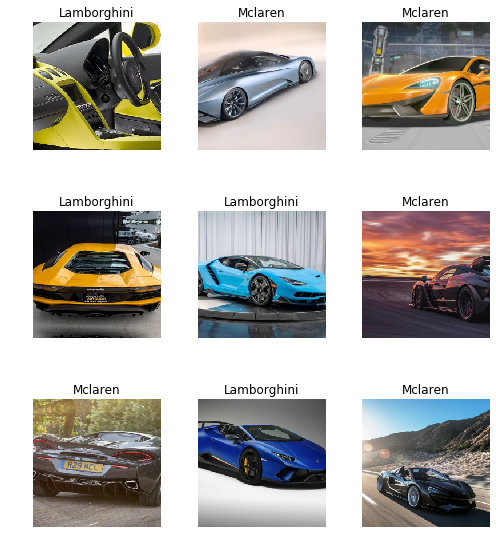

In [17]:
data.show_batch(rows=3, figsize=(7,8))

In [18]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Jagaur', 'Lamborghini', 'Mclaren'], 3, 228, 57)

In [0]:
learn1 = cnn_learner(data, models.resnet50, metrics=error_rate)

In [20]:
learn1.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,1.225214,0.880037,0.456140,00:17
1,0.824368,0.518204,0.210526,00:16
2,0.619247,0.621491,0.228070,00:17
3,0.523598,0.592808,0.210526,00:16
4,0.432094,0.498486,0.192982,00:16
5,0.363283,0.479654,0.192982,00:16
6,0.315258,0.460543,0.192982,00:16
7,0.285046,0.468186,0.192982,00:16


In [0]:
learn1.save('stage-1-50')

In [22]:
learn1.load('stage-1-50')

Learner(data=ImageDataBunch;

Train: LabelList (228 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Lamborghini,Lamborghini,Lamborghini,Lamborghini,Lamborghini
Path: /content/gdrive/My Drive/fastai-v3/data/Cars;

Valid: LabelList (57 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Lamborghini,Jagaur,Mclaren,Jagaur,Lamborghini
Path: /content/gdrive/My Drive/fastai-v3/data/Cars;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), b

In [0]:
interp = ClassificationInterpretation.from_learner(learn1)

In [24]:
interp.most_confused(min_val=2)

[('Lamborghini', 'Jagaur', 3),
 ('Lamborghini', 'Mclaren', 3),
 ('Mclaren', 'Lamborghini', 2)]

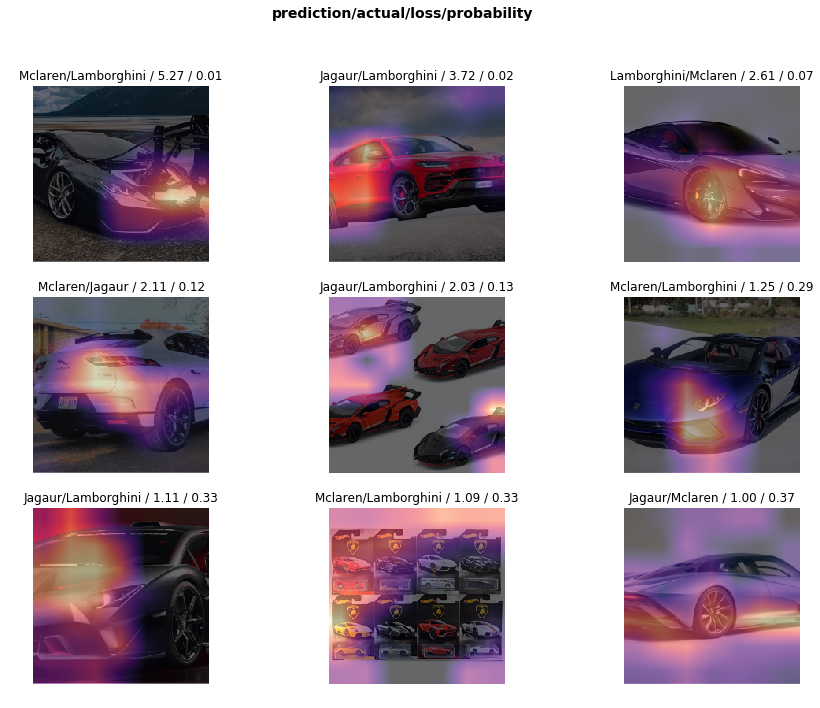

In [25]:
interp.plot_top_losses(9, figsize=(15,11))

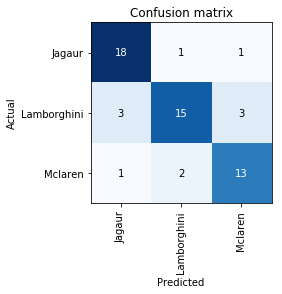

In [26]:
interp.plot_confusion_matrix()

In [27]:
learn1.unfreeze()
learn1.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.119971,0.514668,0.175439,00:17
1,0.126461,0.537704,0.192982,00:16


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


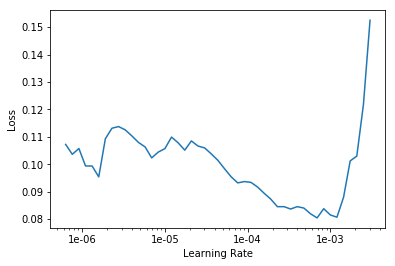

In [0]:
learn1.lr_find()
learn1.recorder.plot()

In [31]:
learn1.unfreeze()
learn1.fit_one_cycle(4, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.057159,0.468079,0.192982,00:15
1,0.043741,0.424441,0.157895,00:17
2,0.056522,0.422545,0.122807,00:17
3,0.056840,0.413051,0.105263,00:17


In [0]:
learn1.save('stage-2-50')